<a href="https://colab.research.google.com/github/team0243/multivariate/blob/main/Chapter3%20CA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA (Principle Component Analysis)

1.ปรับ mean และ std ให้มี mean = 0 และ std =1\
2.หา covariance matrix ของข้อมูลเรา\
3.คำนวณ eigen values-vectors\
4.เลือกมาเฉพาะ eigens ที่จำเป็น\
5.map data ไปบนแกนใหม่

## PCA step by step 

load data

In [7]:
import pandas as pd

In [8]:
example_df = pd.read_csv('http://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')

In [9]:
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


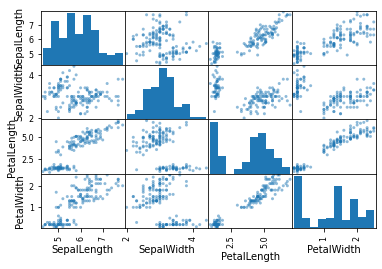

In [11]:
pd.plotting.scatter_matrix(example_df);

In [12]:
import numpy as np

In [ ]:
data_matrix = np.array(example_df.iloc[:,:-1])
data_matrix.T

In [14]:
print(data_matrix.T.shape)

(4, 150)


**1. ปรับ mean และ std ให้มี mean = 0 และ std =1**

$z = xi-u/variance$

In [80]:
meanD = np.mean(data_matrix.T,axis=1)
meanD

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

In [81]:
std0 = np.std(data_matrix.T,axis=1)
std0

array([0.82530129, 0.43214658, 1.75852918, 0.76061262])

In [17]:
zeromatrix = np.zeros([4,10])
zeromatrix.T

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [82]:
x=zeromatrix.T - meanD   ## reshape บังคับปรับขนาดของ matrix ให้เป็นไปตามที่เราต้องการ  -> zeromatrix - meanD.reshape(4,1)
x.T

array([[-5.84333333, -5.84333333, -5.84333333, -5.84333333, -5.84333333,
        -5.84333333, -5.84333333, -5.84333333, -5.84333333, -5.84333333],
       [-3.054     , -3.054     , -3.054     , -3.054     , -3.054     ,
        -3.054     , -3.054     , -3.054     , -3.054     , -3.054     ],
       [-3.75866667, -3.75866667, -3.75866667, -3.75866667, -3.75866667,
        -3.75866667, -3.75866667, -3.75866667, -3.75866667, -3.75866667],
       [-1.19866667, -1.19866667, -1.19866667, -1.19866667, -1.19866667,
        -1.19866667, -1.19866667, -1.19866667, -1.19866667, -1.19866667]])

##เลื่อน mean มาที่ 0

In [ ]:
data_matrixm0 =data_matrix.T - meanD.reshape((4,1))
data_matrixm0 

In [84]:

from matplotlib import pyplot as plt

In [ ]:
plt.hist(data_matrix.T[0,:],bins= 'rice')

In [22]:
data_matrixm0_std = data_matrix.T/std0.reshape((4,1))

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([-1.54333333, -1.21606061, -0.88878788, -0.56151515, -0.23424242,
         0.0930303 ,  0.42030303,  0.74757576,  1.07484848,  1.40212121,
         1.72939394,  2.05666667]),
 <a list of 11 Patch objects>)

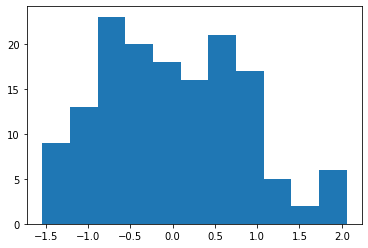

In [23]:

plt.hist(data_matrixm0[0,:],bins= 'rice')

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([-1.54333333, -1.21606061, -0.88878788, -0.56151515, -0.23424242,
         0.0930303 ,  0.42030303,  0.74757576,  1.07484848,  1.40212121,
         1.72939394,  2.05666667]),
 <a list of 11 Patch objects>)

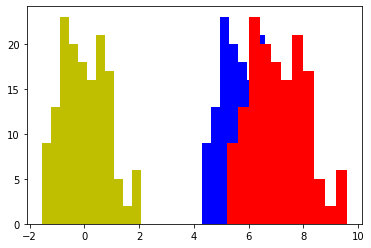

In [24]:
plt.hist(data_matrix.T[0,:],bins= 'rice' , color= 'b')
plt.hist(data_matrixm0_std[0,:], bins= 'rice', color ='r' )
plt.hist(data_matrixm0[0,:],bins= 'rice' , color= 'y')

##วิธีแบบเร็ว

In [71]:
from scipy import  stats

In [ ]:
stats.zscore(data_matrix.T,axis=1)

**2. หา covariance matrix ของข้อมูลเรา**

covariance matrix $E=1/x-1((X-xbar)^x(X-xbar))$

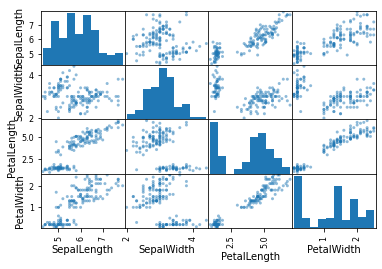

In [69]:
pd.plotting.scatter_matrix(example_df);

In [70]:
data_cov = np.cov(data_matrixm0_std)
data_cov

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

## 1.

In [72]:
meanD=np.mean(data_matrix.T,axis=1)
meanD

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

In [73]:
meanD.shape

(4,)

In [31]:
stdD = np.std(data_matrix.T,axis=1)

 **ขั้นที่ 3**

In [74]:
eigen_values, eigen_vectors = np.linalg.eig(data_cov)

In [87]:
eigen_values

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [88]:
eigen_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

**คำนวณว่า แต่ละ eigen vector อธิบายข้อมูลทั้งหมด ได้ดีแค่ไหน**

In [89]:
variance_explained = []
for i in eigen_values :
          variance_explained.append((i/sum(eigen_values))*100)

print(variance_explained)

[72.77045209380132, 23.030523267680632, 3.6838319576273815, 0.5151926808906417]


In [90]:
cumulative_variance_explained= np.cumsum(variance_explained)
print(cumulative_variance_explained)

[ 72.77045209  95.80097536  99.48480732 100.        ]


In [91]:

#selected_eigen_vectors

**ขั้น 5**

$Xpca = X.W$

In [92]:
x = data_matrixm0_std
x.shape

(4, 150)

In [93]:
#w = selected_eigen_vectors
#w

**PCA**

In [94]:

### import

In [95]:
from sklearn.decomposition import  PCA

In [96]:
#### Define

In [97]:
pca = PCA(n_components=2)

In [98]:
### Fit-Transform

##Example##

In [104]:

import pandas as pd

In [106]:
ex1 = pd.read_csv('/content/nndb_flat.csv')
ex1

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,2.38,15.0,3.300,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,0.00,20.0,1.076,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.00,0.0,0.100,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,5.00,6.0,1.400,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


**ลอง plot scatter matirx**

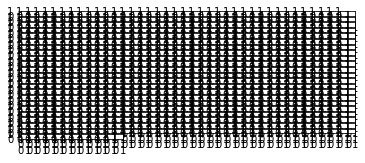

In [108]:
pd.plotting.scatter_matrix(ex1);

**ตรวจสอบขนาดข้อมูลว่ามี data กี่ตัวและมีกี่ dimension**

In [109]:
ex1.shape

(8618, 45)

**เนื่องจาก data มี dimension มากเกินไป เราจะทดสอบดูว่า column ใดให้ข้อมูลซ้ำกับ column อื่น แล้วลบมันออก**

In [110]:
new_ex1 = ex1.iloc[:,7:]   ## เลือกเฉพาะข้อมูลที่เป็นตัวเลข
new_ex1.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


**ตรวจสอบว่าระหว่าง column มี correlation กันมากน้อยแค่ไหน ด้วย numpy**

In [111]:
import numpy as np


In [113]:
corr = np.corrcoef(new_ex1.to_numpy().T) 

In [115]:
corr.shape

(38, 38)

In [116]:
corr

array([[1.        , 0.11030203, 0.80679472, ..., 0.19518065, 0.05667274,
        0.11276635],
       [0.11030203, 1.        , 0.05471538, ..., 0.44460761, 0.37836917,
        0.41631538],
       [0.80679472, 0.05471538, 1.        , ..., 0.06608644, 0.03755914,
        0.02826352],
       ...,
       [0.19518065, 0.44460761, 0.06608644, ..., 1.        , 0.22368557,
        0.26657694],
       [0.05667274, 0.37836917, 0.03755914, ..., 0.22368557, 1.        ,
        0.20529859],
       [0.11276635, 0.41631538, 0.02826352, ..., 0.26657694, 0.20529859,
        1.        ]])

**ใช้ for**

In [117]:
for i in range(corr.shape[0]):
        for j in range(corr.shape[1]):
            if [i != j]  and (corr[i,j] == 1.):
                print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

row = 0 column = 0 corrcoef = 1.0
row = 2 column = 2 corrcoef = 1.0
row = 3 column = 3 corrcoef = 1.0
row = 4 column = 4 corrcoef = 1.0
row = 6 column = 6 corrcoef = 1.0
row = 8 column = 8 corrcoef = 1.0
row = 9 column = 9 corrcoef = 1.0
row = 10 column = 10 corrcoef = 1.0
row = 10 column = 27 corrcoef = 1.0
row = 11 column = 11 corrcoef = 1.0
row = 12 column = 12 corrcoef = 1.0
row = 12 column = 29 corrcoef = 1.0
row = 13 column = 13 corrcoef = 1.0
row = 13 column = 30 corrcoef = 1.0
row = 14 column = 14 corrcoef = 1.0
row = 14 column = 31 corrcoef = 1.0
row = 16 column = 16 corrcoef = 1.0
row = 17 column = 17 corrcoef = 1.0
row = 18 column = 34 corrcoef = 1.0
row = 19 column = 19 corrcoef = 1.0
row = 20 column = 20 corrcoef = 1.0
row = 20 column = 35 corrcoef = 1.0
row = 21 column = 21 corrcoef = 1.0
row = 22 column = 22 corrcoef = 1.0
row = 22 column = 37 corrcoef = 1.0
row = 23 column = 23 corrcoef = 1.0
row = 25 column = 25 corrcoef = 1.0
row = 26 column = 26 corrcoef = 1.0
row = 

**เช็คความสัมพันธ์ data**

In [142]:
new_ex1.iloc[:5,11:29]

,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA
0,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075
1,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075
2,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000
3,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900
4,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500


**plot**

In [119]:
import matplotlib.pyplot as plt


**data ที่มี corr เป็น 1 เท่ากัน**

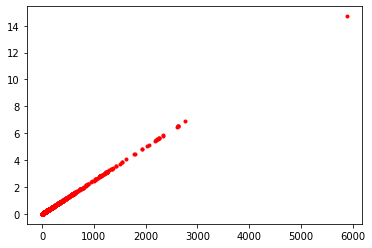

In [120]:
plt.plot(new_ex1.iloc[:,11],new_ex1.iloc[:,28],'r.')

**data ที่มี corr เป็นค่าอื่น**

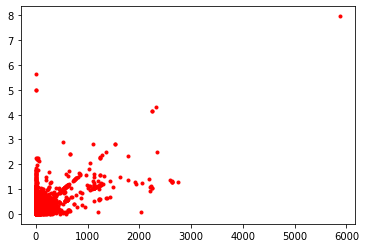

In [141]:
plt.plot(new_ex1.iloc[:,11],new_ex1.iloc[:,29],'r.')

In [122]:
new_ex1.drop(new_ex1.columns[new_ex1.columns.str.contains('_USRDA')].values,axis=1)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,2.38,15.0,3.300,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,0.00,20.0,1.076,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.00,0.0,0.100,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,5.00,6.0,1.400,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00


**ลบ column ซ้ำ**

In [140]:
new_ex1.columns.str.contains('_URADA')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [124]:
new_ex1.columns[new_ex1.columns.str.contains('_URADA')].values

array([], dtype=object)

##Quiz1 ลบ Column ที่มีค่า correlation เป็น 1 เมื่อเทียบกับ column อื่น##

In [139]:
new_ex1.columns.str.contains('_mg')

array([False, False, False, False, False, False, False,  True, False,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [126]:
new_ex1.columns[new_ex1.columns.str.contains('_mg')].values

array(['VitB6_mg', 'VitC_mg', 'VitE_mg', 'Niacin_mg', 'Riboflavin_mg',
       'Thiamin_mg', 'Calcium_mg', 'Iron_mg', 'Magnesium_mg',
       'Manganese_mg', 'Phosphorus_mg', 'Zinc_mg'], dtype=object)

In [127]:
new_ex1.drop(new_ex1.columns[new_ex1.columns.str.contains('_mg')].values,axis=1)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB12_mcg,Folate_mcg,Copper_mcg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.17,3.0,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.13,3.0,0.016,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.01,0.0,0.001,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,1.22,36.0,0.040,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,1.26,20.0,0.024,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,12.00,15.0,0.100,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,2.15,20.0,0.033,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.00,0.0,0.020,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.50,6.0,0.400,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


**เฉลย**

In [143]:
new_ex1_drop = new_ex1.drop(['VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'],axis=1)

In [144]:
ex1_dropped = ex1.drop(['ID','ShortDescrip','Descrip','CommonName','MfgName','ScientificName','VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
ex1_dropped

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,Dairy and Egg Products,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,Dairy and Egg Products,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,Dairy and Egg Products,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,Finfish and Shellfish Products,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,Finfish and Shellfish Products,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,Sweets,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,Finfish and Shellfish Products,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


**ทดลอง plot กราฟ parallel coordinate**

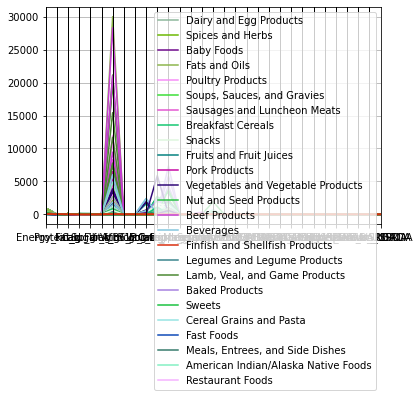

In [146]:
pd.plotting.parallel_coordinates(ex1_dropped,'FoodGroup') 

# ทำ PCA 

In [147]:
from sklearn.decomposition import PCA

In [148]:
pca = PCA(n_components=2)

In [149]:
new_pca = pca.fit_transform(new_ex1_drop.to_numpy())

In [150]:
new_pca.shape

(8618, 2)

## ดูว่ามี food group อะไรบ้าง

In [ ]:
FG= set(ex1['FoodGroup'])
FG

#สร้าง Dictionary เพื่อแทนค่าที่เป็น text ให้เป็นตัวเลข เพื่อจะได้ plot สีได้ 

**สร้าง color_list แบบง่าย (เมื่อรันใหม่เลขอันดับอาจจะเปลี่ยนแปลง)**

1.   รายการในลิสต์
2.   รายการในลิสต์

In [186]:
color_list = {}     ### คำสั่งวนลูปเพื่อเปลี่ยนข้อมูลเป็นตัวเลข
num = 0
for each_fg in FG:
    if each_fg not in color_list:
       color_list[each_fg] = num
       num += 1 

**สร้าง color_list ตามข้างล่าง
(เมื่อรันใหม่เลขอันดับอาจจะไม่เปลี่ยนแปลง)**

In [187]:
FG_l = list(FG)  ## แปลงเป็น list
FG_l.sort()  ### เรียงจากน้อยไปมาก
color_list2 = {}     ### คำสั่งวนลูปเพื่อเปลี่ยนข้อมูลเป็นตัวเลข
num = 0
for each_fg in FG_l:
     if each_fg not in color_list2:
       color_list2[each_fg] = num
       num += 1 
  

In [188]:
color_list2

{'American Indian/Alaska Native Foods': 0,
 'Baby Foods': 1,
 'Baked Products': 2,
 'Beef Products': 3,
 'Beverages': 4,
 'Breakfast Cereals': 5,
 'Cereal Grains and Pasta': 6,
 'Dairy and Egg Products': 7,
 'Fast Foods': 8,
 'Fats and Oils': 9,
 'Finfish and Shellfish Products': 10,
 'Fruits and Fruit Juices': 11,
 'Lamb, Veal, and Game Products': 12,
 'Legumes and Legume Products': 13,
 'Meals, Entrees, and Side Dishes': 14,
 'Nut and Seed Products': 15,
 'Pork Products': 16,
 'Poultry Products': 17,
 'Restaurant Foods': 18,
 'Sausages and Luncheon Meats': 19,
 'Snacks': 20,
 'Soups, Sauces, and Gravies': 21,
 'Spices and Herbs': 22,
 'Sweets': 23,
 'Vegetables and Vegetable Products': 24}

In [189]:
color_list

{'American Indian/Alaska Native Foods': 4,
 'Baby Foods': 6,
 'Baked Products': 5,
 'Beef Products': 0,
 'Beverages': 9,
 'Breakfast Cereals': 24,
 'Cereal Grains and Pasta': 7,
 'Dairy and Egg Products': 2,
 'Fast Foods': 8,
 'Fats and Oils': 17,
 'Finfish and Shellfish Products': 18,
 'Fruits and Fruit Juices': 23,
 'Lamb, Veal, and Game Products': 11,
 'Legumes and Legume Products': 3,
 'Meals, Entrees, and Side Dishes': 14,
 'Nut and Seed Products': 10,
 'Pork Products': 19,
 'Poultry Products': 13,
 'Restaurant Foods': 16,
 'Sausages and Luncheon Meats': 20,
 'Snacks': 1,
 'Soups, Sauces, and Gravies': 21,
 'Spices and Herbs': 22,
 'Sweets': 12,
 'Vegetables and Vegetable Products': 15}

## แทนค่า text ใน dictionary ด้วยตัวเลขที่กำหนด

In [197]:
ex1_dropped2 = ex1_dropped.replace(color_list)

In [198]:
ex1_dropped2

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,2,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,2,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,2,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,2,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,18,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,18,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,12,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,18,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


**plot  กราฟ scatter**

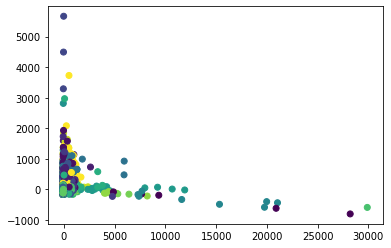

In [199]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = ex1_dropped2['FoodGroup'])

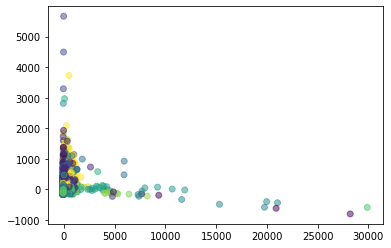

In [200]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = ex1_dropped2['FoodGroup'],alpha=0.5)

## ทดลอง เปรียบเทียบค่าสารอาหาร food group กับ sweet

In [201]:
bb = ex1_dropped2[(ex1_dropped2['FoodGroup']==1) | (ex1_dropped2['FoodGroup']==8)]

In [202]:
bb

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
2031,1,413.0,6.47,10.98,72.05,45.97,0.4,188.0,0.819,2.00,15.4,159.0,410.0,0.049,5.99,0.206,7.7,0.208889,0.481765,0.833333,0.171111,0.028000,0.3975,0.512125,0.535385,0.512500,0.341667,0.000054,0.050000,0.221429,0.140000,0.076364
2042,1,409.0,9.09,9.09,72.73,31.80,1.8,0.0,0.909,0.00,0.0,15.0,31.0,0.185,2.56,1.407,24.9,0.000000,0.534706,0.000000,0.000000,0.196000,0.0375,0.568187,0.594615,0.568333,0.025833,0.000206,0.109524,0.194286,0.452727,0.161818
6005,1,410.0,33.20,25.60,11.00,9.00,1.8,0.0,0.179,0.99,0.0,134.0,20.0,0.227,5.42,0.111,10.7,0.000000,0.105294,0.412500,0.000000,0.032667,0.3350,0.108250,0.109231,0.128333,0.016667,0.000252,0.121429,0.581429,0.194545,0.737273
6006,1,538.0,6.17,33.36,56.90,0.27,4.0,3.0,0.167,0.00,0.0,8.0,138.0,0.101,1.20,0.333,7.6,0.003333,0.098235,0.000000,0.000000,0.482000,0.0200,0.052625,0.060000,0.039167,0.115000,0.000112,0.171429,0.277143,0.138182,0.117273
6007,1,523.0,7.00,32.70,56.20,0.00,5.2,31.0,0.230,0.00,1.7,39.0,131.0,0.166,1.54,0.774,4.1,0.034444,0.135294,0.000000,0.018889,0.000000,0.0975,0.102813,0.161538,0.062500,0.109167,0.000184,0.183333,0.295714,0.074545,0.096364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8542,1,503.0,7.79,23.36,65.32,1.00,5.3,4.0,0.213,0.36,0.0,10.0,174.0,0.523,2.32,0.000,6.7,0.004444,0.125294,0.150000,0.000000,0.235333,0.0250,0.078875,0.076923,0.012500,0.145000,0.000581,0.347619,0.285714,0.121818,0.223636
8568,1,557.0,6.60,33.40,57.40,1.41,4.4,4.0,0.210,0.00,2.0,7.0,124.0,0.249,1.70,0.000,6.7,0.004444,0.123529,0.000000,0.022222,0.090667,0.0175,0.092500,0.123077,0.116667,0.103333,0.000277,0.166667,0.262857,0.121818,0.077273
8591,1,465.0,8.70,15.20,73.40,0.53,5.7,4.0,0.180,0.06,0.2,16.0,159.0,0.116,1.63,0.000,15.7,0.004444,0.105882,0.025000,0.002222,0.235333,0.0400,0.026250,0.215385,0.183333,0.132500,0.000129,0.230952,0.454286,0.285455,0.104545
8593,1,429.0,12.60,9.50,73.39,0.54,14.2,7.0,0.170,0.00,0.0,17.0,11.0,0.545,2.28,0.000,8.6,0.007778,0.100000,0.000000,0.000000,0.334000,0.0425,0.129375,0.084615,0.291667,0.009167,0.000606,0.359524,0.377143,0.156364,0.348182


In [203]:
pca = PCA(n_components=2)
new_pca2 = pca.fit_transform(bb.iloc[:,1:].to_numpy())

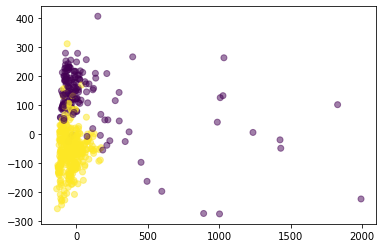

In [204]:
plt.scatter(new_pca2[:,0],new_pca2[:,1],c = bb['FoodGroup'],alpha=0.5)

In [206]:
baby_pca = pca.transform(bb[bb['FoodGroup']==1].iloc[:,1:].to_numpy())
fast_pca = pca.transform(bb[bb['FoodGroup']==8].iloc[:,1:].to_numpy())

In [ ]:
#plt.scatter(baby_pca[:,0],baby_pca[:,1],c == 'c',alpha=0.5)
#plt.scatter(fast_pca[:,0],fast_pca[:,1],c == 'r',alpha=0.5)

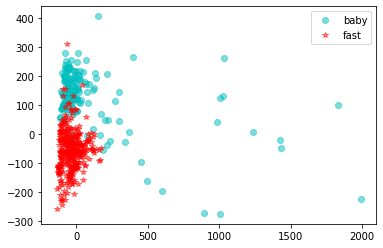

In [207]:
plt.plot(baby_pca[:,0],baby_pca[:,1],'oc',alpha=0.5,label='baby')
plt.plot(fast_pca[:,0],fast_pca[:,1],'*r',alpha=0.5,label='fast')
plt.legend()

## 2 principle components เป็นตัวแทนของข้อมูลได้ดีแค่ไหน

In [208]:
pca.explained_variance_ratio_

array([0.54281817, 0.17284264])